In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from collections import Counter

# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\rounakbanik\the-movies-dataset\versions\7


In [2]:
df1 = pd.read_csv(path+'\\movies_metadata.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_4824\4081365077.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(path+'\\movies_metadata.csv')


In [3]:
df1_red = df1
df1_red = df1_red.drop(['adult', 'homepage', 'overview', 'poster_path', 'belongs_to_collection'], axis = 1)
df1_red = df1_red.drop(['production_companies', 'spoken_languages', 'video', 'title', 'tagline', 'imdb_id', 'production_countries'], axis = 1)
# в budget 36к из 45к значений со значением 0. дропаем их
df1_red['budget'] = pd.to_numeric(df1_red['budget'], errors='coerce').fillna(0).astype(int)
df1_red = df1_red[df1_red['budget'] > 0].reset_index(drop=True)
# только вышедшие фильмы
df1_red = df1_red[df1_red['status'] == 'Released'].reset_index(drop=True)
df1_red = df1_red.drop(['status'], axis = 1)
# выберем только фильмы с 10-ю самыми популярными языками
temp_arr = Counter(df1_red['original_language']).most_common(10)
languages = np.array(temp_arr)[:, 0]
df1_red = df1_red[df1_red['original_language'].isin(languages)].reset_index(drop=True)
# уберем фильмы без кассовых сборов

df1_red['revenue'] = pd.to_numeric(df1_red['revenue'], errors='coerce').fillna(0).astype(int)
df1_red = df1_red[df1_red['revenue'] > 0].reset_index(drop=True)
# преобразование года выпуска
df1_red['release_date'] = df1_red['release_date'].str[:4].astype(int)

df1_red

,budget,genres,id,original_language,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,21.946943,1995,373554033,81.0,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,17.015539,1995,262797249,104.0,6.9,2413.0
2,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,3.859495,1995,81452156,127.0,6.1,34.0
3,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,Heat,17.924927,1995,187436818,170.0,7.7,1886.0
4,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,en,Sudden Death,5.23158,1995,64350171,106.0,5.5,174.0
...,...,...,...,...,...,...,...,...,...,...,...
5232,11000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",395834,en,Wind River,40.796775,2017,184770205,111.0,7.4,181.0
5233,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",280422,ru,Все и сразу,0.201582,2014,3,0.0,6.0,4.0
5234,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62757,en,Dikari,0.903061,2006,1328612,100.0,5.8,6.0
5235,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",63281,en,Про любоff,0.121844,2010,1268793,107.0,4.0,3.0


In [4]:
import ast

#преобразование столбца genres
df1_red = df1_red[df1_red['genres'] != '[]'].reset_index(drop=True)

genre_names = []

for i in range(len(df1_red)):
    temp_arr = ast.literal_eval(df1_red['genres'][i])
    genre_names.extend([genre['name'] for genre in temp_arr])

genre_names = list(set(genre_names))

for i in range(len(genre_names)):
    df1_red[f'gen_{genre_names[i]}'] = df1_red['genres'].str.contains(genre_names[i], case=False, na=False).astype(int)

In [5]:
#преобразование столбца original_language

for i in range(len(languages)):
    df1_red[f'lan_{languages[i]}'] = df1_red['original_language'].str.contains(languages[i], case=False, na=False).astype(int)

In [6]:
# мелкие правки

df1_red = df1_red.drop(['genres', 'original_language'], axis = 1)

df1_red['id'] = pd.to_numeric(df1_red['id'], errors='coerce').fillna(0).astype(int)
df1_red = df1_red[df1_red['id'] > 0].reset_index(drop=True)

df1_red['popularity'] = pd.to_numeric(df1_red['popularity'], errors='coerce').fillna(0).astype(float)
df1_red = df1_red[df1_red['popularity'] > 0].reset_index(drop=True)

df1_red['runtime'] = pd.to_numeric(df1_red['runtime'], errors='coerce').fillna(0).astype(float)
df1_red = df1_red[df1_red['runtime'] > 0].reset_index(drop=True)

In [7]:
df1_red

,budget,id,original_title,popularity,release_date,revenue,runtime,vote_average,vote_count,gen_Mystery,...,lan_en,lan_fr,lan_ru,lan_hi,lan_es,lan_de,lan_ja,lan_it,lan_ko,lan_zh
0,30000000,862,Toy Story,21.946943,1995,373554033,81.0,7.7,5415.0,0,...,1,0,0,0,0,0,0,0,0,0
1,65000000,8844,Jumanji,17.015539,1995,262797249,104.0,6.9,2413.0,0,...,1,0,0,0,0,0,0,0,0,0
2,16000000,31357,Waiting to Exhale,3.859495,1995,81452156,127.0,6.1,34.0,0,...,1,0,0,0,0,0,0,0,0,0
3,60000000,949,Heat,17.924927,1995,187436818,170.0,7.7,1886.0,0,...,1,0,0,0,0,0,0,0,0,0
4,35000000,9091,Sudden Death,5.231580,1995,64350171,106.0,5.5,174.0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209,50000000,378236,The Emoji Movie,33.694599,2017,66913939,86.0,5.8,327.0,0,...,1,0,0,0,0,0,0,0,0,0
5210,11000000,395834,Wind River,40.796775,2017,184770205,111.0,7.4,181.0,1,...,1,0,0,0,0,0,0,0,0,0
5211,800000,62757,Dikari,0.903061,2006,1328612,100.0,5.8,6.0,0,...,1,0,0,0,0,0,0,0,0,0
5212,2000000,63281,Про любоff,0.121844,2010,1268793,107.0,4.0,3.0,0,...,1,0,0,0,0,0,0,0,0,0


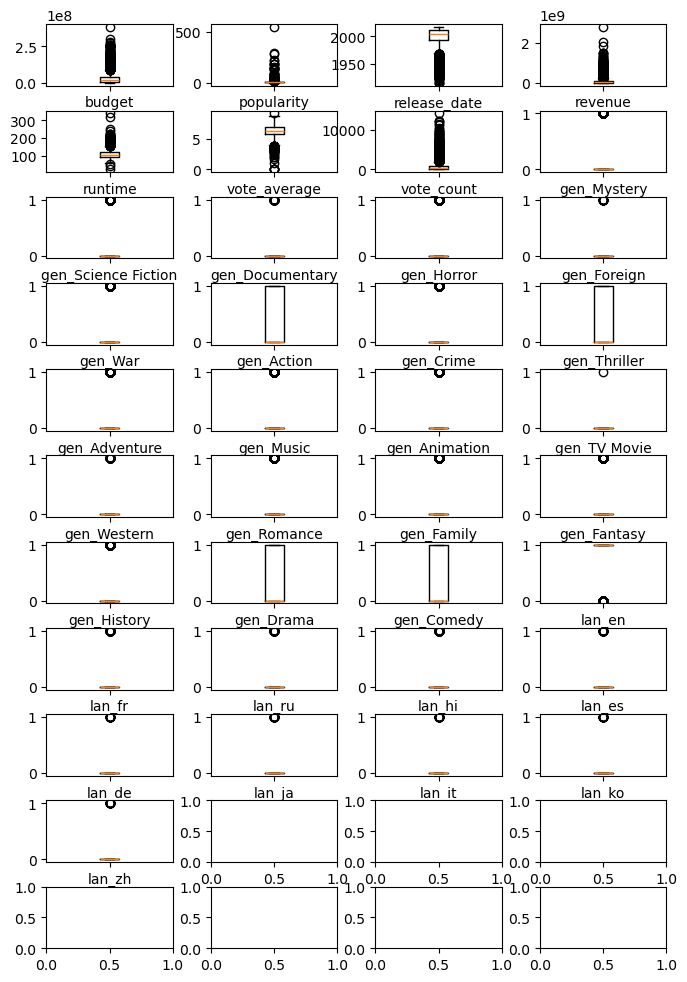

In [8]:
#больше проверка на "битые значения", чем информативные графики

df3 = df1_red.drop(['id', 'original_title'], axis = 1)

labels = df3.columns.to_list()

fig, ax = plt.subplots(11, 4, figsize=(8, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.3) 

for i in range(37):
    ax[i // 4, i % 4].boxplot(df3.loc[:,[labels[i]]], tick_labels = [labels[i]])

plt.show()

In [9]:
from sklearn.preprocessing import MinMaxScaler

X = df3.to_numpy()

scaler = MinMaxScaler(feature_range=(0, 1))
scaler_dataset = scaler.fit_transform(X)
X_scal = scaler_dataset
X_scal

array([[7.89473660e-02, 4.00865957e-02, 7.84313725e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.71052629e-01, 3.10792725e-02, 7.84313725e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.21052606e-02, 7.04945479e-03, 7.84313725e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.10526053e-03, 1.64945992e-03, 8.92156863e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.26315528e-03, 2.22549049e-04, 9.31372549e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31578921e-02, 7.26810056e-05, 9.01960784e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

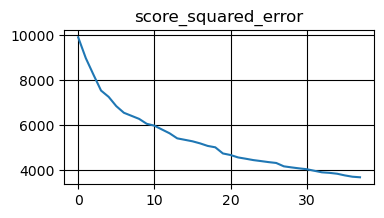

In [10]:
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore", category = UserWarning, message = "KMeans is known to have a memory leak on Windows with MKL")

arr_score = []

for i in range(2, 40):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = "auto", max_iter = 500).fit(X_scal)
    score = kmeans.inertia_
    arr_score.append(score)

plt.figure(figsize = (4, 2))
plt.title('score_squared_error')
plt.plot(arr_score, '-')
plt.grid(True, color = 'k')

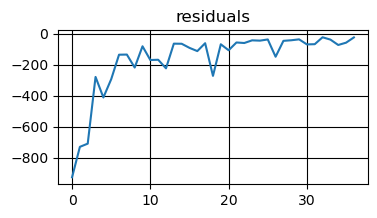

In [11]:
residual_arr = []

for i in range(len(arr_score) - 1):
    res = arr_score[i + 1] - arr_score[i]
    residual_arr.append(res)

plt.figure(figsize = (4, 2))
plt.title('residuals')
plt.plot(residual_arr, '-')
plt.grid(True, color = 'k')

In [12]:
# "локоть" при 6-ти кластерах

In [13]:
kmeans = KMeans(n_clusters = 6, random_state = 0, n_init = "auto", max_iter = 500).fit(X_scal)

In [14]:
Counter(kmeans.labels_) # распределение окей

Counter({np.int32(1): 2060,
         np.int32(0): 964,
         np.int32(4): 617,
         np.int32(2): 587,
         np.int32(5): 575,
         np.int32(3): 411})

In [15]:
# сами кластера
claster_movie_id = []

for i in range(10):
    temp = []
    for j in range(len(kmeans.labels_)):
        if kmeans.labels_[j] == i:
            temp.append(j)
    claster_movie_id.append(temp)

In [28]:
def cosine_similarity(a, b):

    b1 = b.T
    dot_product = np.dot(a, b1)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b1)
    similarity = dot_product / (norm_a * norm_b)

    return similarity

In [29]:
print(f'самый первый фильм в датасете ({df1_red['original_title'][0]}) находится в кластере №', kmeans.labels_[0])

самый первый фильм в датасете (Toy Story) находится в кластере № 3


In [55]:
arr_distants = []

for i in range(1, len(claster_movie_id[3]) - 1):
    arr_distants.append([claster_movie_id[3][i], cosine_similarity(X_scal[claster_movie_id[3][0]], X_scal[claster_movie_id[3][i]])])

arr_distants = np.array(arr_distants)
arr_distants = arr_distants[arr_distants[:, 1].argsort()[::-1]]

In [109]:
num = 10

print(f'наиболее близкие {num} фильмов к фильму ({df1_red['original_title'][0]}):')

col_list = df1_red.columns

def is_true(a, b):
    if a == True:
        print('--', b, end = ' ')

for i in range(num):
    print(i + 1, '"', df1_red['original_title'][arr_distants[:, 0][i]], '" жанры :')
    [is_true(df1_red[x][arr_distants[:, 0][i]], x) for x in col_list[9:29]] # 9-29 - номера столбцов с жанрами
    print(' \n')

наиболее близкие 10 фильмов к фильму (Toy Story):
1 " Toy Story 2 " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

2 " Monsters, Inc. " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

3 " The Simpsons Movie " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

4 " Despicable Me 2 " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

5 " Chicken Run " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

6 " Cloudy with a Chance of Meatballs " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

7 " Hotel Transylvania 2 " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

8 " The SpongeBob SquarePants Movie " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

9 " Over the Hedge " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

10 " Oliver & Company " жанры :
-- gen_Animation -- gen_Family -- gen_Comedy  

